In [2]:
    import numpy as np
    import scipy.stats as sps
    import math
    import matplotlib.pyplot as plt
    %pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
N = 10000

оценка 1 - $2\overline{X}$ - несмещенная, сильно состоятельная.

оценка 2 - $\overline{X} + X_{(n)}/2$ - смещенная

оценка 3 - $(n + 1)X_{(1)}$ - несмещенная, не состоятельная. 

оценка 4 - $X_{(1)} + X_{(n)}$ - несмещенная, сильно состоятельная.

оценка 5 - $\frac{n+1}{n}X_{(n)}$ - насмещенная, сильно состоятельная.

In [85]:
#вычисление оценок
def evaluations():
    means = sample.cumsum() / np.arange(1, N + 1)
    
    mins = np.array([sample[0]])
    for i in range(1, N): 
        mins = np.append(mins, sample[i] if sample[i] < mins[- 1] else mins[- 1])

    maxs = np.array([sample[0]])
    for i in range(1, N): 
        maxs = np.append(maxs, sample[i] if sample[i] > maxs[- 1] else maxs[- 1])
    
    ev1 = np.array([2 * means[n] for n in range(N)])
    ev2 = np.array([means[n] + maxs[n] / 2 for n in range(N)])
    ev3 = np.array([(n + 2) * mins[n] for n in range(N)])
    ev4 = np.array([mins[n] + maxs[n] for n in range(N)])
    ev5 = np.array([(n + 2) * maxs[n] / (n + 1) for n in range(N)])
    return np.array([ev1, ev2, ev3, ev4, ev5])
#постронение графиков
def plots(evs, th):
    plt.figure(figsize=(15, 5))
    plot(np.arange(1, N + 1), np.abs(evs[0] - th), color='red', linewidth=1.0, label='$|2\overline{X} - \\theta|$')
    plot(np.arange(1, N + 1), np.abs(evs[1] - th), color='orange', linewidth=1.0, label='$|\overline{X} + X_{(n)}/2 - \\theta|$')
    plot(np.arange(1, N + 1), np.abs(evs[2] - th), color='green', linewidth=1.0, label='$|(n + 1)X_{(1)} - \\theta|$')
    plot(np.arange(1, N + 1), np.abs(evs[3] - th), color='blue', linewidth=1.0, label='$|X_{(1)} + X_{(n)} - \\theta|$')
    plot(np.arange(1, N + 1), np.abs(evs[4] - th), color='magenta', linewidth=1.0, label='$|\\frac{n+1}{n}X_{(n)} - \\theta|$')
    leg = plt.legend()
    for legobj in leg.legendHandles:
        legobj.set_linewidth(2.0)
    plt.grid()
    
    
def plots_good(evs, th):
    plt.figure(figsize=(15, 5))
    plot(np.arange(1, N + 1), np.abs(evs[0] - th), color='red', linewidth=1.0, label='$|2\overline{X} - \\theta|$')
    plot(np.arange(1, N + 1), np.abs(evs[1] - th), color='orange', linewidth=1.0, label='$|\overline{X} + X_{(n)}/2 - \\theta|$')
    #plot(np.arange(1, N + 1), np.abs(evs[2] - th), color='green', linewidth=1.0, label='$|(n + 1)X_{(1)}|$')
    plot(np.arange(1, N + 1), np.abs(evs[3] - th), color='blue', linewidth=1.0, label='$|X_{(1)} + X_{(n)} - \\theta|$')
    plot(np.arange(1, N + 1), np.abs(evs[4] - th), color='magenta', linewidth=1.0, label='$|\\frac{n+1}{n}X_{(n)} - \\theta|$')
    leg = plt.legend()
    for legobj in leg.legendHandles:
        legobj.set_linewidth(2.0)
    plt.grid()
    

### Сравнение оценок для $\theta = 1$.

In [86]:
th = 1
sample = sps.uniform.rvs(loc=0, scale=th, size=N)
evs = evaluations()

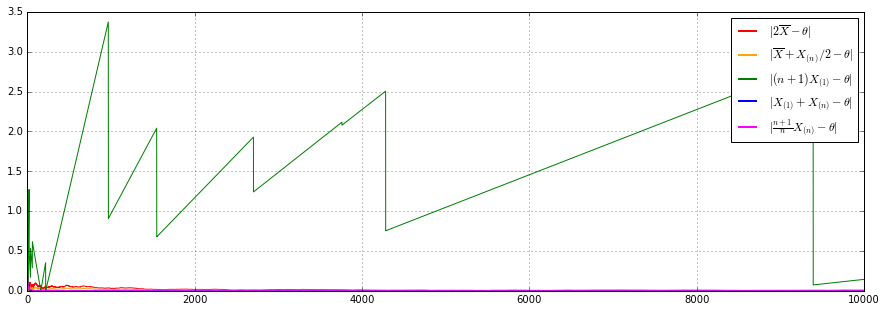

In [69]:
plots(evs, th)
plt.ylim(0,3.5)
plt.show()

Сравнение оценок без оценки $(n+1)X_{(1)}$:

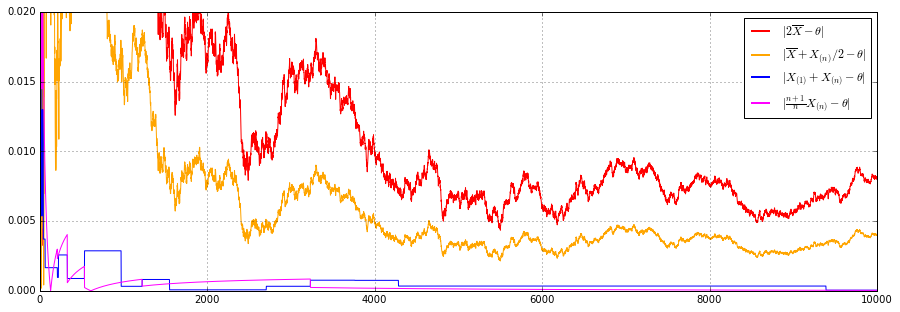

In [71]:
plots_good(evs, th)
plt.ylim(0, 0.02)
plt.show()

### Сравнение оценок для $\theta = 5$

In [72]:
th = 5
sample = sps.uniform.rvs(loc=0, scale=th, size=N)
evs = evaluations()

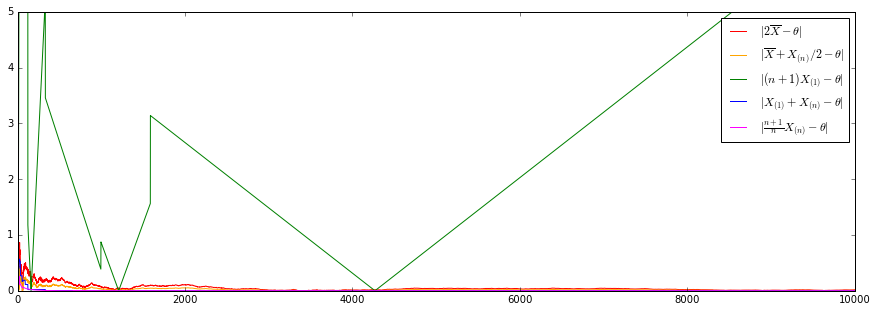

In [74]:
plots(evs, th)
plt.ylim(0, 5)
plt.legend()
plt.grid()
plt.show()

Сравнение оценок без оценки $(n+1)X_{(1)}$:

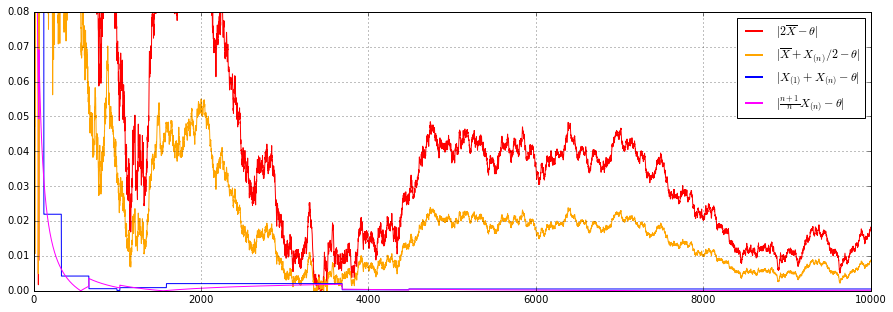

In [76]:
plots_good(evs, th)
plt.ylim(0, 0.08)
plt.show()

### Сравнение оценок для $\theta = 10$

In [77]:
th = 10
sample = sps.uniform.rvs(loc=0, scale=th, size=N)
evs = evaluations()

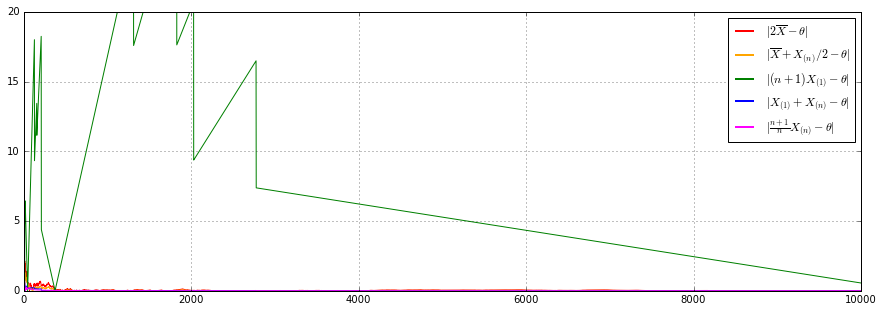

In [79]:
plots(evs, th)
plt.ylim(0, 20)
plt.show()

Сравнение оценок без оценки $(n+1)X_{(1)}$:

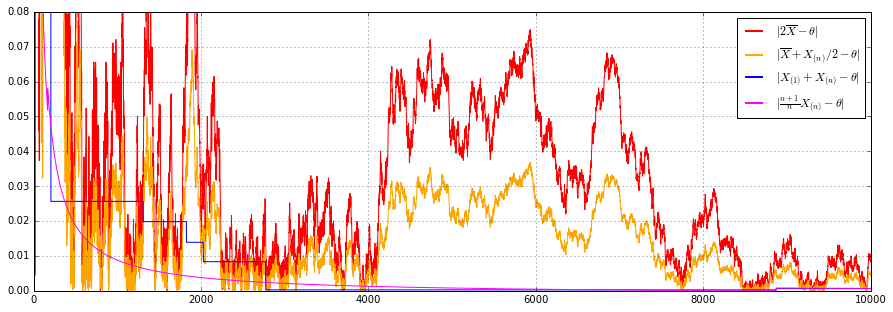

In [84]:
plots_good(evs, th)
plt.ylim(0, 0.08)
plt.show()

### Вывод:

Из построенных графиков легко видеть, что оценка $s_3(X)=(n+1)X_{(1)}$ плохо оценивает параметр равномерного распределения, несмотря на то, что является несмещенной оценкой. 

Оценки $s_4 = X_{(1)} + X_{(n)}$ и $s_5 = \frac{n+1}{n}X_{(n)}$ оценивают параметр наиболее точно. 